In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import csv

In [3]:
file = open('Cities.csv')
my_file = csv.reader(file)
lines = []
x = []
y = []
for line in my_file:
    x_point = float(line[0].split()[1])
    y_point = float(line[0].split()[2])
    x.append(x_point)
    y.append(y_point)
    lines.append([x_point, y_point])

x_y = np.array(lines)
c = x_y.shape[0]
ratio = np.sqrt((max(x) - min(x)) * (max(x) - min(x)) + (max(y) * min(y)) * (max(y) * min(y)))
normalized_x_y = (x_y - np.array([min(x), min(y)])) / ratio

In [5]:
# Generate a neuron network of a given size
def som_network(size):
    return np.random.rand(size, 2)

def closest_neuron(network, city):
    dist = network - city
    dist = dist ** 2
    dist = np.sum(dist, axis=1)
    return np.where(dist == np.amin(dist))

# Get the range gaussian of given radix around a center index.
def get_neighborhood(center, r, domain):
    if r < 1:
      r = 1
    deltas = np.absolute(center - np.arange(domain))
    distances = np.minimum(deltas, domain - deltas)
    return np.exp(-(distances * distances) / (2 * (r * r)))
    
# Plot a graphical representation of the problem
def plot_city_network(network, coordinates):
    fig = plt.figure(figsize=(5, 5), frameon = False)
    axis = fig.add_axes([0,0,1,1])
    axis.set_aspect('equal', adjustable='datalim')
    plt.axis('off')
    axis.scatter(coordinates[:, 0], coordinates[:, 1], color='red', s=4)
    axis.plot(network[:,0], network[:,1], 'r.', ls='-', color='#0063ba', markersize=2)
    plt.show()

epoch 2000


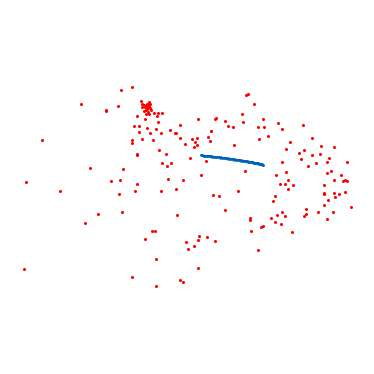

epoch 4000


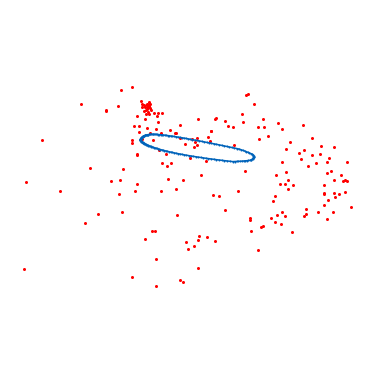

epoch 6000


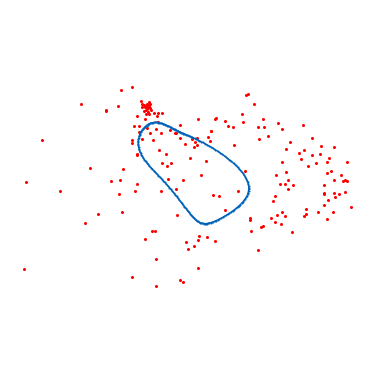

epoch 8000


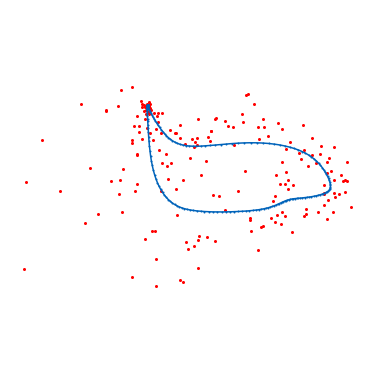

epoch 10000


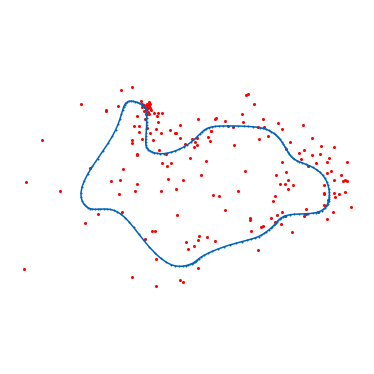

epoch 12000


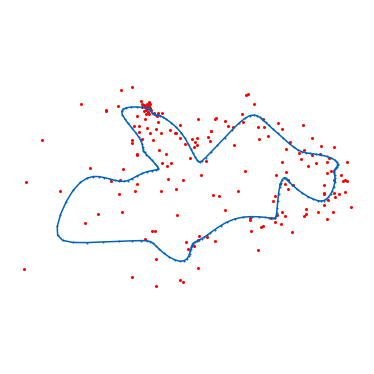

epoch 14000


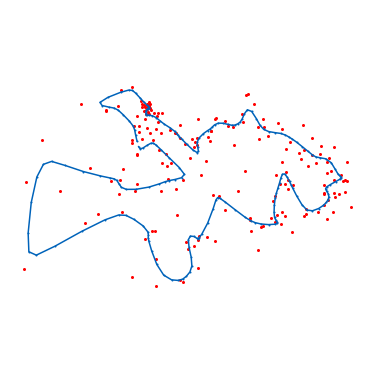

epoch 16000


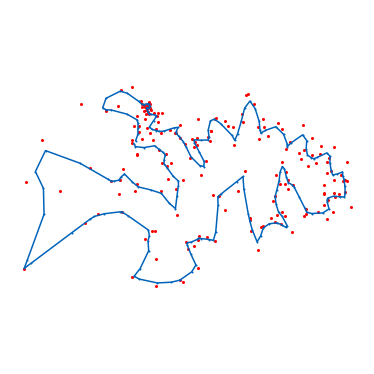

epoch 18000


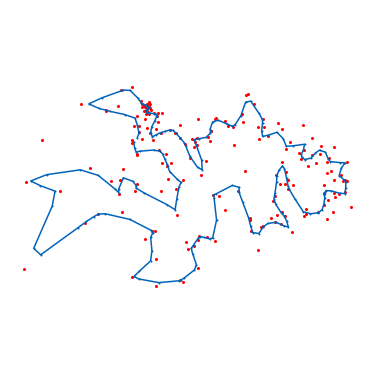

epoch 20000


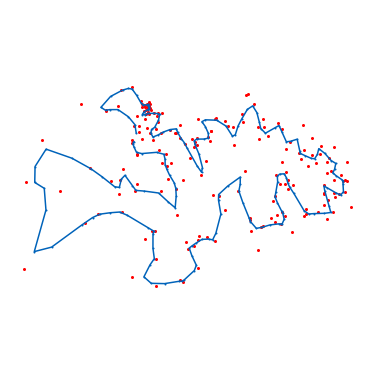

epoch 22000


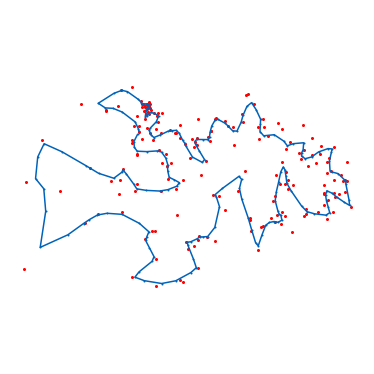

epoch 24000


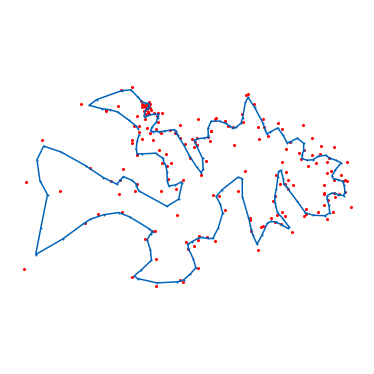

Radius has completely decayed at 24487 iterations


In [7]:
"""Solve the TSP using a Self-Organizing Map."""

iterations = 50000
lr = 0.8
# The population size is 8 times the number of cities
radius = c * 8

# Generate an adequate network of neurons
net = som_network(c)

for iteration in range(iterations):
  rand_city = np.random.randint(0, c)
  winner = closest_neuron(net, normalized_x_y[rand_city])[0][0]
  neighbour = get_neighborhood(winner, radius // 10, c)
  net += neighbour[:,np.newaxis] * lr * ( normalized_x_y[rand_city] - net)
  lr = lr * 0.99997
  radius = radius * 0.9997

  # Check for plotting interval
  if (iteration + 1) % 2000 == 0:
    print(f'epoch {iteration + 1}')
    plot_city_network(net, normalized_x_y)

  # Check if any parameter has completely decayed
  if radius < 1:
    print('Radius has completely decayed at {} iterations'.format(iteration))
    break

  if lr < 0.001:
    print('Learning rate has completely decayed at {} iterations'.format(iteration))
    break